In [53]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from src.predict import inference
from src.dataset import get_load_data
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt

In [55]:
_, val_set = get_load_data(root = "../../data", dataset = "FashionMNIST")
val_dataloader = DataLoader(val_set, batch_size=1, shuffle = True)
img = next(iter(val_dataloader))[0]

In [56]:
trained_model_path = "../model_weights/vae_fmnist.pt"

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(trained_model_path, map_location=torch.device(device))

In [57]:
results = inference(model, img.to(device))
img_to_show = results[0].detach().cpu().numpy()

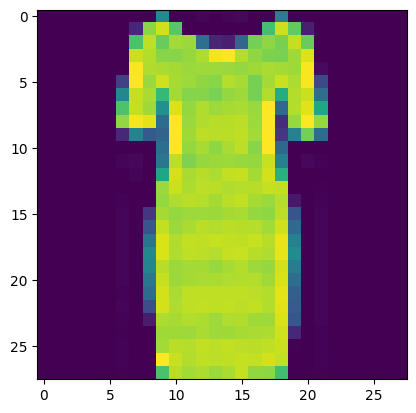

In [58]:
img_gt_to_show = img.squeeze(0).detach().cpu().numpy()
plt.imshow(img_gt_to_show.transpose(1,2,0))
plt.show()

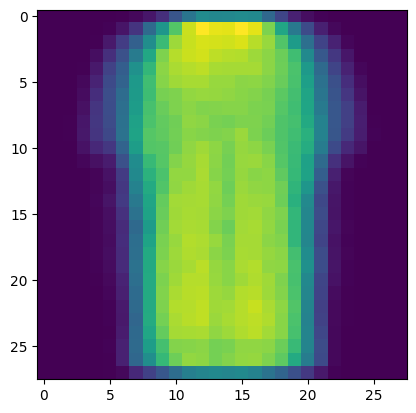

In [59]:
plt.imshow(img_to_show.transpose(1,2,0))
plt.show()